[ 63820.39   25082.14   67222.      9418.16   26268.03   60826.86
  27041.6    45972.24   25881.46   34666.6    22608.53   68405.98
  65487.24   12651.54   69408.11   37946.82   31755.63   26286.8
  75678.49   51032.81   27102.92    9468.09   25142.01   14447.92
  25099.27   52854.93   27304.32   10429.85   23161.09   25980.99
  36631.83   47222.27   22503.65   37416.68   26125.14   34981.96
  48221.88   22008.521  27154.89   41178.14   21384.72  119611.48
  38208.88   31461.77   27245.34   26215.97    7524.94   26623.36
   9483.6    29586.43    6265.37   66221.15   36928.52   30774.26
  31326.521  33500.42   55529.53   28597.77   27543.68   44711.27
  43356.56 ]
[ 38967.875   31966.025   63577.81     4741.1387  26085.168   67326.02
  35230.883   73310.76    33103.92    34684.996   33253.58    56222.67
  84821.98    10612.345  112123.05    44929.402   33886.9     39757.45
  93417.51    40552.234   31174.938   12915.717   35846.61    16219.593
  30602.443   48942.96    33332.215   10898

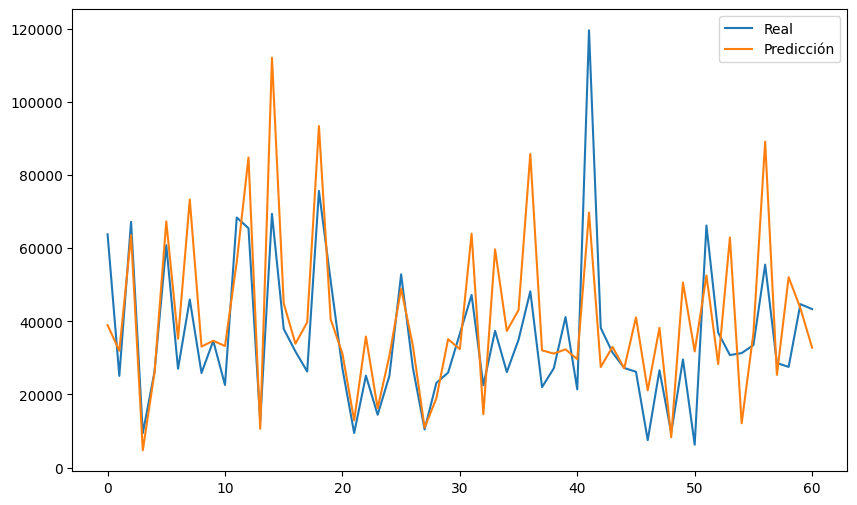

In [2]:

import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv("../data/dataset_limpio.csv")

df_training_per_day = df.groupby(['Year', 'Month', 'Day', 'DayOfWeek', 'Season'])['TotalSales'].sum().reset_index()

# split data into X and y
X = df_training_per_day[['Year', 'Month', 'Day', 'DayOfWeek', 'Season']]
X = pd.get_dummies(X, columns=['Season'], drop_first=True)

# Etiqueta (target)
y = df_training_per_day['TotalSales']

seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# fit model
model =  XGBRegressor(
  n_estimators=100,     # Número de árboles
  max_depth=3,          # Profundidad máxima
  learning_rate=0.1,    # Tasa de aprendizaje
  min_child_weight=1,   # Peso mínimo necesario para crear un nodo hijo
  subsample=1,          # Fracción de muestras usadas para entrenar
  colsample_bytree=1,   # Fracción de características usadas por árbol
  random_state=42       # Semilla aleatoria
)
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)

print(y_test.values)
print(y_pred)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.legend()
plt.show()